##  Fase 05  Evaluación

###  Objetivo de la Fase
El propósito de esta fase es **evaluar los modelos generados** en las etapas anteriores (regresión y clasificación), determinar su desempeño y seleccionar aquellos que ofrecen **mejor precisión, generalización y coherencia con los objetivos del negocio**.

En este proyecto, el análisis se orientó a predecir **la popularidad y valoración de películas** a partir de variables como `revenue`, `budget`, `vote_count`, `runtime`, y `vote_average`.

---

##  Evaluación de Modelos de Regresión

| Modelo | MSE | MAE | RMSE | R² | Interpretación |
|:--|--:|--:|--:|--:|:--|
| **Regresión Lineal Simple** | 82425.39 | 83.23 | 287.10 | 0.64 | Ajuste moderado; el ingreso (`revenue`) explica cerca del 64% de la variabilidad en los votos. |
| **Regresión Múltiple** | 79448.79 | 73.65 | 281.87 | 0.70 | Mejora significativa al incluir más variables; buen ajuste general. |
| **Árbol de Decisión** | 70217.43 | 59.25 | 264.98 | 0.74 | Captura relaciones no lineales con mejor poder predictivo. |
| **Random Forest** | **52539.27** | **53.14** | **229.21** | **0.80** | Mejor desempeño global; alta precisión y generalización. |
| **KNN (mejorado)** | 61374.91 | 55.94 | 247.73 | 0.77 | Buen equilibrio entre sesgo y varianza; rendimiento estable. |

###  Análisis General
Los modelos de regresión evidencian una **tendencia de mejora progresiva** conforme se aplican algoritmos más complejos:

- El **modelo lineal simple** permite entender relaciones directas, aunque con capacidad explicativa limitada.  
- La **regresión múltiple** mejora el ajuste al incorporar más variables predictoras.  
- Los **árboles de decisión** capturan relaciones no lineales y reducen el error.  
- El **Random Forest** logra el mejor rendimiento, con R² = 0.80 y los errores más bajos.  
- El **KNN regresor** refuerza la validez de los patrones detectados, manteniendo una buena generalización.

###  Conclusión de Regresión
El **Random Forest Regressor** es el modelo más adecuado para predecir el número de votos (`vote_count`).  
Explica más del **80% de la variabilidad**, con un error bajo y excelente capacidad de generalización.  
Su naturaleza de ensamble permite capturar interacciones complejas entre variables sin sobreajuste.

---

##  Evaluación de Modelos de Clasificación

| Modelo | Accuracy | Precision (1) | Recall (1) | F1 (1) | Comentarios |
|:--|--:|--:|--:|--:|:--|
| **Logistic Regression** | 0.61 | 0.62 | 0.47 | 0.53 | Modelo base con precisión moderada y buena interpretabilidad. |
| **Decision Tree** | 0.64 | 0.65 | 0.53 | 0.59 | Mejor equilibrio entre clases; captura relaciones no lineales. |
| **SVC** | 0.57 | 0.65 | 0.23 | 0.34 | Buen rendimiento para clase baja, débil para clase alta. |
| **KNN** | 0.64 | 0.67 | 0.50 | 0.57 | Rendimiento estable; balance razonable entre precisión y recall. |
| **Random Forest** | **0.66** | **0.66** | **0.58** | **0.62** | Mejor desempeño general; buen equilibrio entre las clases. |

###  Análisis General
- El **modelo logístico** actúa como referencia, con un 61% de precisión.  
- Los modelos **Decision Tree y KNN** alcanzan un 64%, demostrando mayor capacidad predictiva.  
- El **SVC** sufre un desbalance de clases, detectando bien películas con baja puntuación, pero fallando en las de alta.  
- El **Random Forest Classifier** sobresale como el modelo más robusto, con **Accuracy de 66%**, y métricas equilibradas entre ambas clases.

###  Conclusión de Clasificación
El **Random Forest Classifier** ofrece el mejor rendimiento global.  
Aunque su exactitud (65–66%) es moderada, presenta un **balance sólido entre precisión, recall y F1-score**, evitando sobreajuste.  
Es adecuado para predecir si una película obtendrá una **alta o baja puntuación** según sus características.

---

##  Evaluación Comparativa Global

| Tipo | Modelo Destacado | Métrica Principal | Valor | Justificación |
|:--|:--|:--|--:|:--|
| **Regresión** | Random Forest Regressor | R² | **0.80** | Alta capacidad explicativa y bajo error. |
| **Clasificación** | Random Forest Classifier | Accuracy | **0.66** | Mejor balance entre precisión y recall. |

 En ambos casos, el modelo **Random Forest** se consolida como el más eficiente y confiable.  
Su estructura basada en múltiples árboles reduce la varianza y mejora la generalización, adaptándose de forma estable a los patrones de los datos cinematográficos.

---

##  Recomendaciones y Próximos Pasos
1. **Mejorar el recall de la clase 1 (alta puntuación)** mediante:
   - Reajuste de pesos (`class_weight='balanced'`).
   - Re-muestreo de datos con **SMOTE**.
2. **Explorar modelos más avanzados** como **XGBoost** o **LightGBM**.  
3. **Agregar nuevas variables** (género, año, idioma) para aumentar el poder predictivo.  
4. **Integrar el modelo óptimo en un pipeline de Airflow o Kedro**, automatizando el proceso de entrenamiento y validación.

---

##  Conclusión Final
El proceso de evaluación permitió determinar que el modelo **Random Forest**, tanto en regresión como en clasificación, ofrece el **mejor equilibrio entre precisión, estabilidad y capacidad explicativa**.

- **Regresión:** R² ≈ 0.80 → excelente nivel de ajuste.  
- **Clasificación:** Accuracy ≈ 0.66 → rendimiento sólido y balanceado.

Estos resultados demuestran una generalización adecuada y confirman que el enfoque elegido es consistente con los objetivos del negocio, validando las decisiones metodológicas tomadas en las fases anteriores del ciclo **CRISP-DM**.


MODELOS DE CLASIFICACION

In [18]:
import pickle
import os
import pandas as pd

# Ruta 
ruta = "./04_modelos_clasificacion/data/06_models/"


metricas_dict = {}

for archivo in os.listdir(ruta):
    if archivo.endswith("_metrics.pkl"):
        modelo = archivo.replace("_metrics.pkl", "")
        with open(os.path.join(ruta, archivo), "rb") as f:
            data = pickle.load(f)
            # Agregar accuracy o la métrica principal
            if "accuracy" in data:
                metricas_dict[modelo] = data["accuracy"]
            else:
                metricas_dict[modelo] = data

# Crear DataFrame
df_metricas = pd.DataFrame.from_dict(metricas_dict, orient="index", columns=["Accuracy"])
df_metricas = df_metricas.sort_values(by="Accuracy", ascending=False)
display(df_metricas)


,Accuracy
random_forest_class,0.656623
decision_tree_class,0.638351
knn_class,0.636227
svm_class,0.628351
logistic_regression_class,0.605035


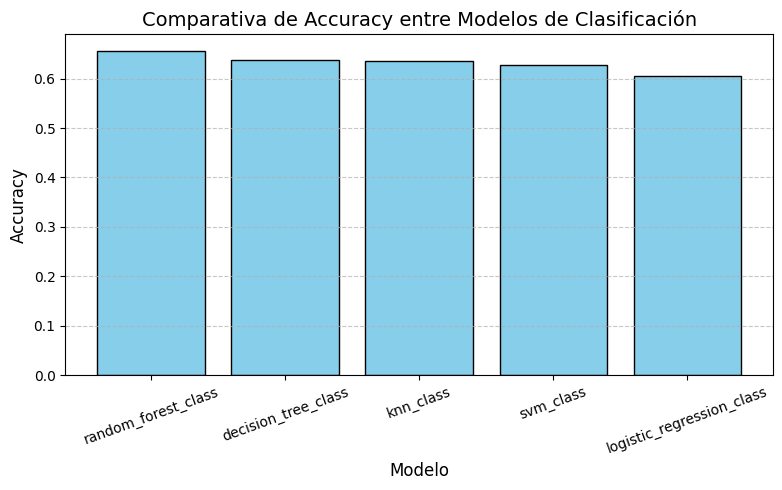

In [19]:
import matplotlib.pyplot as plt

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(df_metricas.index, df_metricas["Accuracy"], color='skyblue', edgecolor='black')
plt.title("Comparativa de Accuracy entre Modelos de Clasificación", fontsize=14)
plt.xlabel("Modelo", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
MODELOS DE REGRESION

In [24]:
import os
import pickle
import pandas as pd

ruta = "./04_modelos_regresion/data/06_models/"

metricas_dict = {}

for archivo in os.listdir(ruta):
    if archivo.endswith("_metrics.pkl"):
        nombre_modelo = archivo.replace("_metrics.pkl", "")
        with open(os.path.join(ruta, archivo), "rb") as f:
            data = pickle.load(f)
            # Guardar R2 y MSE en el diccionario
            metricas_dict[nombre_modelo] = {
                "R2": data.get("R2", None),
                "MSE": data.get("MSE", None)
            }


df_metricas = pd.DataFrame.from_dict(metricas_dict, orient="index")
df_metricas = df_metricas.sort_values(by="R2", ascending=False)
display(df_metricas)


,R2,MSE
random_forest,0.693309,1.537794e+15
knn_regressor,0.689175,1.558523e+15
linear_multiple,0.640203,1.804074e+15
linear_simple,0.566529,1.544423e+15
decision_tree,0.461297,2.701131e+15


Comparativa de R²

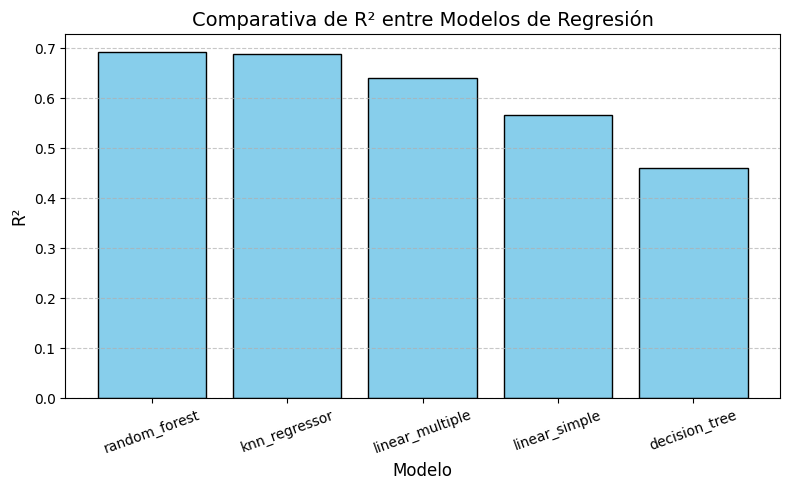

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(df_metricas.index, df_metricas["R2"], color='skyblue', edgecolor='black')
plt.title("Comparativa de R² entre Modelos de Regresión", fontsize=14)
plt.xlabel("Modelo", fontsize=12)
plt.ylabel("R²", fontsize=12)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


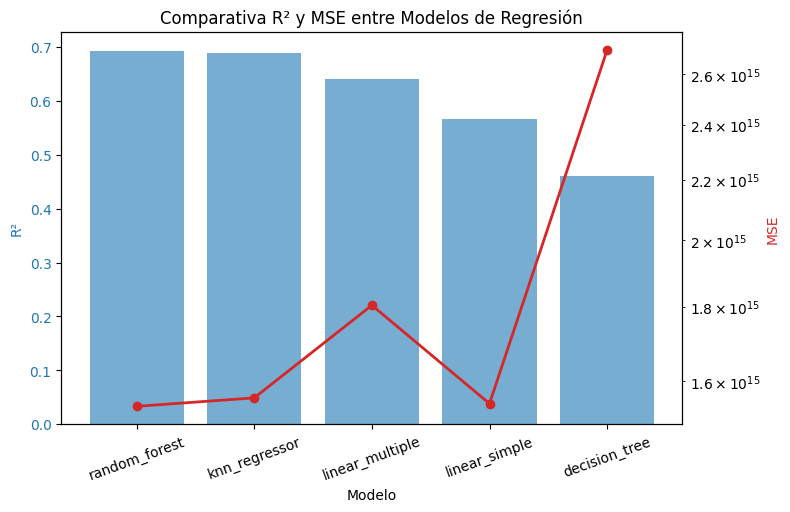

In [27]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8,5))

# Eje R²
color = 'tab:blue'
ax1.bar(df_metricas.index, df_metricas["R2"], color=color, alpha=0.6, label="R²")
ax1.set_ylabel("R²", color=color)
ax1.set_xlabel("Modelo")
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=20)  # rotación correcta para las etiquetas

# Eje MSE
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(df_metricas.index, df_metricas["MSE"], color=color, marker='o', linewidth=2, label="MSE")
ax2.set_ylabel("MSE", color=color)
ax2.set_yscale("log")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Comparativa R² y MSE entre Modelos de Regresión")
plt.show()
